## Behavioral RSA

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os.path as op
from pylab import rcParams
from neurora.rdm_cal import bhvRDM
from neurora.rdm_corr import rdm_correlation_spearman
from neurora.corr_cal_by_rdm import rdms_corr
from neurora.rsa_plot import plot_rdm, plot_corrs_by_time, plot_nps_hotmap, plot_corrs_hotmap

C:\Users\const\miniconda3\lib\site-packages\nilearn\datasets\__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
# set path
data_path = "../new_data"
beh_path = "beh"
my_embedding_path = "../assets/myEmbedding.txt"
# set task name
wordtask = "wordchoice"
imagetask = "imagechoice"
witask = "wordimagematch"

In [3]:
word_df = pd.read_csv(op.join(data_path, wordtask + ".csv"))
image_df = pd.read_csv(op.join(data_path, imagetask + ".csv"))
wi_df = pd.read_csv(op.join(data_path, witask + ".csv"))

In [4]:
rts = np.array(word_df.groupby(["sub", "animacy"]).mean()["rt"].reset_index()["rt"])


Computing RDM

RDM computing finished!


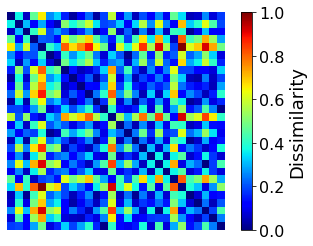

0

In [6]:
animacy_rdm = bhvRDM(np.reshape(rts, [28, 2, -1]), method="euclidean", sub_opt=0)
plot_rdm(animacy_rdm)

In [24]:
word_df.groupby(["sub", "item"]).mean().reset_index().groupby("sub").count()

,item,isAnimate,words.thisRepN,words.thisTrialN,trialN,words.thisIndex,guide_image.started,ready_mouse.started,mouse.x,mouse.y,...,op_left.started,word_item_2.started,op_left_2.started,text.started,text.stopped,年龄,frameRate,Unnamed: 42,rt,correct
sub,,,,,,,,,,,,,,,,,,,,,
sub-001,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-002,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-003,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-005,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-006,147,147,147,147,147,147,1,147,147,147,...,147,147,147,0,0,147,147,0,147,147
sub-007,151,151,151,151,151,151,1,151,151,151,...,151,151,151,0,0,151,151,0,151,151
sub-008,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-009,160,160,160,160,160,160,1,160,160,160,...,160,160,160,0,0,160,160,0,160,160
sub-010,159,159,159,159,159,159,1,159,159,159,...,159,159,159,0,0,159,159,0,159,159


In [28]:
word_df[["sub", "item", "rt", "animacy", "relation", "stimuli"]]

,sub,item,rt,animacy,relation,stimuli
0,sub-001,孕妇,1614.0,animate,match,word
1,sub-001,钢笔,1455.0,inanimate,nomatch,word
2,sub-001,牙齿,1199.0,inanimate,nomatch,word
3,sub-001,番茄,1397.0,inanimate,nomatch,word
4,sub-001,和尚,1578.0,animate,match,word
...,...,...,...,...,...,...
8440,sub-031,病人,968.0,animate,match,word
8441,sub-031,狐狸,1162.0,animate,match,word
8442,sub-031,野猪,1430.0,animate,nomatch,word
8443,sub-031,家庭,1068.0,animate,match,word


## Semantic similarity

In [41]:
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.keyedvectors import KeyedVectors

In [42]:
# rcParams["font.sans-serif"] = ["SimHei"]
rcParams["font.family"] = ["SimHei"]
rcParams["axes.unicode_minus"] = False
animacy_path = "../assets/animacy.xlsx"

In [43]:
animate_words = []
inanimate_words = []
animacy = pd.read_excel(animacy_path, sheet_name=0)
# get animacy dict of words
animacy_dict = {}
for index, row in animacy.iterrows():
    animacy_dict[row["animate"]] = "animate"
    animacy_dict[row["non-animate"]] = "inanimate"
    animate_words.append(row["animate"])
    inanimate_words.append(row["non-animate"])

In [44]:
# words = animate_words[:15] + inanimate_words[:15]
words = animate_words + inanimate_words

In [45]:
# read embedding
w2v = KeyedVectors.load_word2vec_format(my_embedding_path, binary=False)
# normalize vectors
w2v.init_sims(replace=True)

In [46]:
# get vectors of word stimulus
vec_matrix = np.array([w2v[word] for word in words])
# get cosin similarity of words
cosine_matrix = np.dot(vec_matrix, vec_matrix.T)

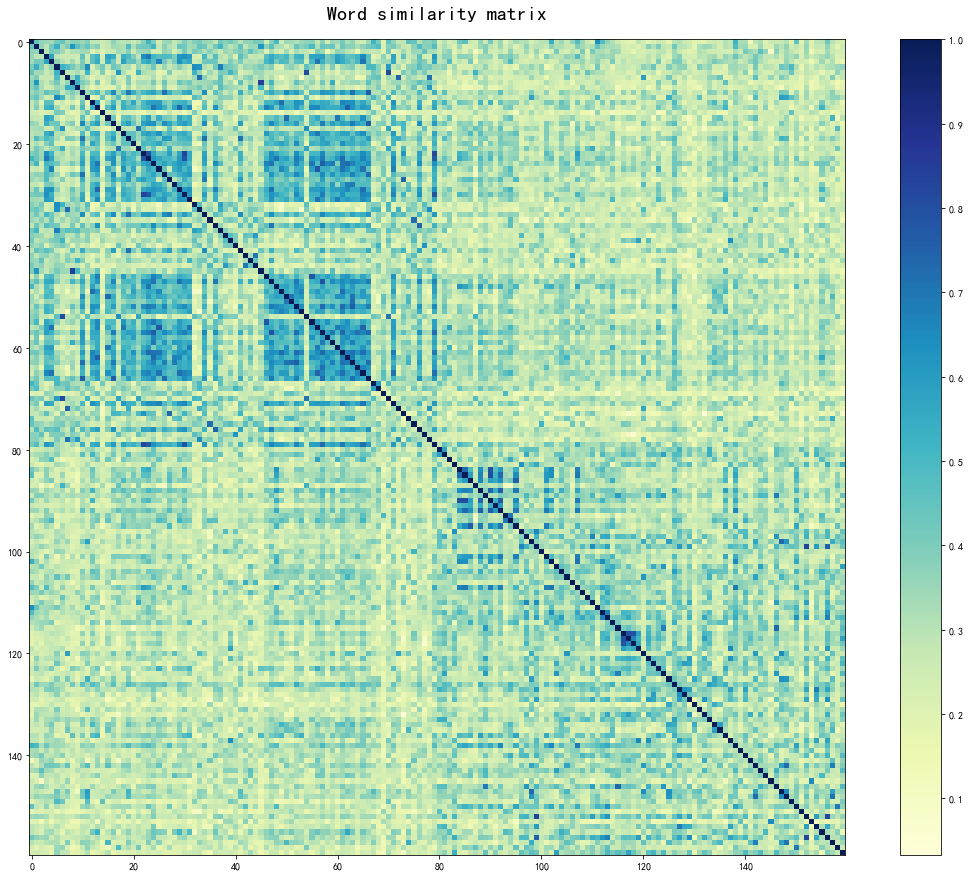

<Figure size 432x288 with 0 Axes>

In [58]:
from matplotlib import cm
import matplotlib.pyplot as plt
# cmap = cm.get_cmap("Greens")
cmap = cm.get_cmap("YlGnBu")

fig, ax = plt.subplots(figsize=(20,15))
cax = ax.matshow(cosine_matrix, interpolation="nearest", cmap=cmap)
# ax.grid(True)
plt.title("Word similarity matrix", fontdict={"fontsize": 20}, pad=20)
# plt.xticks(range(len(words)), words, rotation=90)
# plt.yticks(range(len(words)), words)
ax.xaxis.set_ticks_position("bottom")
ax.yaxis.set_ticks_position("left")
fig.colorbar(cax, ticks=np.arange(0, 1.001, 0.1))
plt.show()
plt.savefig("../figures/semantic.svg", bbox_inches="tight")

## Section 2: Preprocessing

In [2]:
data_path = visual_92_categories.data_path()
fname = op.join(data_path, 'visual_stimuli.csv')
conds = read_csv(fname)
conditions = []
for c in conds.values:
    cond_tags = list(c[:2])
    cond_tags += [('not-' if i == 0 else '') + conds.columns[k]
                  for k, i in enumerate(c[2:], 2)]
    conditions.append('/'.join(map(str, cond_tags)))
event_id = dict(zip(conditions, conds.trigger + 1))
print(event_id)
sub_id = [0, 1, 2]
megdata = np.zeros([3, 92, 306, 1101], dtype=np.float32)
subindex = 0
for id in sub_id:
    fname = op.join(data_path, 'sample_subject_'+str(id)+'_tsss_mc.fif')
    raw = read_raw_fif(fname)
    events = mne.find_events(raw, min_duration=.002)
    events = events[events[:, 2] <= 92]
    subdata = np.zeros([92, 306, 1101], dtype=np.float32)
    for i in range(92):
        epochs = mne.Epochs(raw, events=events, event_id=i + 1, baseline=None,
                            tmin=-0.1, tmax=1, preload=True)
        data = epochs.average().data
        subdata[i] = data
    megdata[subindex] = subdata
    subindex = subindex + 1

# the shape of MEG data: megdata is [3, 92, 306, 1101]
# n_subs = 3, n_conditions = 92, n_channels = 306, n_timepoints = 1101 (-100ms to 1000ms)

{'0/human bodypart/human/not-face/animal/natural': 1, '1/human bodypart/human/not-face/animal/natural': 2, '2/human bodypart/human/not-face/animal/natural': 3, '3/human bodypart/human/not-face/animal/natural': 4, '4/human bodypart/human/not-face/animal/natural': 5, '5/human bodypart/human/not-face/animal/natural': 6, '6/human bodypart/human/not-face/animal/natural': 7, '7/human bodypart/human/not-face/animal/natural': 8, '8/human bodypart/human/not-face/animal/natural': 9, '9/human bodypart/human/not-face/animal/natural': 10, '10/human bodypart/human/not-face/animal/natural': 11, '11/human bodypart/human/not-face/animal/natural': 12, '12/human face/human/face/animal/natural': 13, '13/human face/human/face/animal/natural': 14, '14/human face/human/face/animal/natural': 15, '15/human face/human/face/animal/natural': 16, '16/human face/human/face/animal/natural': 17, '17/human face/human/face/animal/natural': 18, '18/human face/human/face/animal/natural': 19, '19/human face/human/face/ani

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_0_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)


    Range : 59000 ... 1650999 =     59.000 ...  1650.999 secs
Ready.


<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: Split raw file detected but next file /Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_0_tsss_mc-1.fif does not exist.
  raw = read_raw_fif(fname)


1374 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101

10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropp

0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_1_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: Split raw file detected but next file /Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_1_tsss_mc.fi-2.fif does not exist.
  raw = read_raw_fif(fname)


1356 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
Not setting metadata
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 o

No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
N

Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
9 matching events found
No baseline corr

<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: This filename (/Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_2_tsss_mc.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = read_raw_fif(fname)
<ipython-input-2-5375e93cc7e7>:17: RuntimeWarning: Split raw file detected but next file /Users/zitonglu/mne_data/MNE-visual_92_categories-data/sample_subject_2_tsss_mc.fi-3.fif does not exist.
  raw = read_raw_fif(fname)


Trigger channel has a non-zero initial value of 28 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
1294 events found
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93 200 222 244]
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped

Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline cor

Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
8 matching events found
No baseline correction applied
0 projection items activated
Loading data for 8 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
10 matching events found
No baseline correction applied
0 projection items activated
Loading data for 10 events and 1101 original time points ...
1 bad epochs dropped
Not setting metadata
Not setting metadata
9 matching events found
No baseline correction applied
0 projection items activated
Loading data for 9 events and 1101 original time points ...
0 b

In [3]:
# shape of megdata: [n_subs, n_cons, n_chls, n_ts] -> [n_cons, n_subs, n_chls, n_ts]
megdata = np.transpose(megdata, (1, 0, 2, 3))

# shape of megdata: [n_cons, n_subs, n_chls, n_ts] -> [n_cons, n_subs, n_trials, n_chls, n_ts]
# here data is averaged, so set n_trials = 1
megdata = np.reshape(megdata, [92, 3, 1, 306, 1101])

## Section 3: Calculating the neural pattern similarity

0 0.01 1.0
(5, 100)


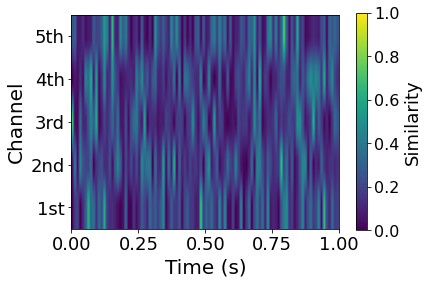

0 0.01 1.0
(5, 5000)


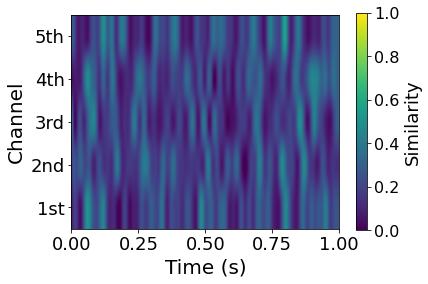

0

In [4]:
# Get data under different condition
# Here we calculate the neural pattern similarity (NPS) between two stimulus
# Seeing Humanface vs. Seeing Non-Humanface

# get data under "humanface" condtion
megdata_humanface = megdata[12:24]
# get data under "nonhumanface" condition
megdata_nonhumanface = megdata[36:48]

# Average the data
avg_megdata_humanface = np.average(megdata_humanface, axis=0)
avg_megdata_nonhumanface = np.average(megdata_nonhumanface, axis=0)

# Create NPS input data
# Here we extract the data from first 5 channels between 0ms and 1000ms
nps_data = np.zeros([2, 3, 1, 5, 1000]) # n_cons=2, n_subs=3, n_chls=5, n_ts=1000
nps_data[0] = avg_megdata_humanface[:, :, :5, 100:1100] # the start time of the data is -100ms
nps_data[1] = avg_megdata_nonhumanface[:, :, :5, 100:1100] # so 100:1200 corresponds 0ms-1000ms

# Calculate the NPS with a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
nps = nps(nps_data, time_win=10, time_step=10, sub_opt=0)

# Plot the NPS results
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True)

# Smooth the results and plot
plot_nps_hotmap(nps[:, :, 0], time_unit=[0, 0.01], abs=True, smooth=True)

## Section 4: Calculating single RDM and Plotting

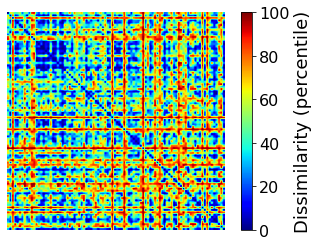

0

In [5]:
# Calculate the RDM based on the data during 190ms-210ms
rdm = eegRDM(megdata[:, :, :, :, 290:310], sub_opt=0)

# Plot this RDM
plot_rdm(rdm, percentile=True)

## Section 5: Calculating RDMs and Plotting

In [ ]:
# Calculate the RDMs by a 10ms time-window
# (raw sampling requency is 1000Hz, so here time_win=10ms/(1s/1000Hz)/1000=10)
rdms = eegRDM(megdata, time_opt=1, time_win=10, time_step=10, sub_opt=0)

# Plot the RDM of -100ms, 0ms, 50ms, 100ms, 150ms, 200ms
times = [0, 10, 20, 30, 40, 50]
for t in times:
    plot_rdm(rdms[t], percentile=True)

## Section 6: Calculating the Similarity between two RDMs

In [ ]:
# RDM of 200ms
rdm_sample1 = rdms[30]
# RDM of 800ms
rdm_sample2 = rdms[90]

# calculate the correlation coefficient between these two RDMs
corr = rdm_correlation_spearman(rdm_sample1, rdm_sample2)
print(corr)

## Section 7: Calculating the Similarity and Plotting

In [ ]:
# Calculate the representational similarity between 200ms and all the time points
corrs1 = rdms_corr(rdm_sample1, rdms)

# Plot the corrs1
corrs1 = np.reshape(corrs1, [1, 110, 2])
plot_corrs_by_time(corrs1, time_unit=[-0.1, 0.01])

# Calculate and Plot multi-corrs
corrs2 = rdms_corr(rdm_sample2, rdms)
corrs = np.zeros([2, 110, 2])
corrs[0] = corrs1
corrs[1] = corrs2
labels = ["by 200ms's data", "by 800ms's data"]
plot_corrs_by_time(corrs, labels=labels, time_unit=[-0.1, 0.01])

## Section 8: Calculating the RDMs for each channels

In [ ]:
# Calculate the RDMs for the first six channels by a 10ms time-window between 0ms and 1000ms
rdms_chls = eegRDM(megdata[:, :, :, :6, 100:1100], chl_opt=1, time_opt=1, time_win=10, time_step=10, sub_opt=0)

# Create a 'human-related' coding model RDM
model_rdm = np.ones([92, 92])
for i in range(92):
    for j in range(92):
        if (i < 24) and (j < 24):
            model_rdm[i, j] = 0
    model_rdm[i, i] = 0

# Plot this coding model RDM
plot_rdm(model_rdm)

# Calculate the representational similarity between the neural activities and the coding model for each channel
corrs_chls = rdms_corr(model_rdm, rdms_chls)

# Plot the representational similarity results
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01])

# Set more parameters and re-plot
plot_corrs_hotmap(corrs_chls, time_unit=[0, 0.01], lim=[-0.15, 0.15], smooth=True, cmap='bwr')